# Dataset preprocessing

- Script 1

In [2]:
import os
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

extract_dir = "extracted_dataset"
parquet_filename = "flattened_dataset.parquet"
parquet_processed_filename = "processed_dataset.parquet"

In [12]:
df = pd.read_parquet(os.path.join(extract_dir, parquet_filename))

df.head()

,full_log,@timestamp,location,id,previous_output,filename,predecoder_hostname,predecoder_program_name,predecoder_timestamp,agent_ip,...,rule_mitre_tactic,decoder_name,decoder_parent,decoder_ftscomment,input_type,GeoLocation_city_name,GeoLocation_country_name,GeoLocation_region_name,GeoLocation_location_lon,GeoLocation_location_lat
0,Jan 15 02:32:32 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,None,fox,mail,freshclam,Jan 15 02:32:32,172.17.131.81,...,None,freshclam,None,None,log,None,None,None,NaN,NaN
1,Jan 15 02:32:32 taylorcruz-mail freshclam[2851...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,None,fox,taylorcruz-mail,freshclam,Jan 15 02:32:32,192.168.128.170,...,None,freshclam,None,None,log,None,None,None,NaN,NaN
2,Jan 15 02:32:37 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:37.000000Z,/var/log/syslog,1.686147e+09,None,fox,mail,freshclam,Jan 15 02:32:37,172.17.131.81,...,None,freshclam,None,None,log,None,None,None,NaN,NaN
3,Jan 15 02:32:42 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:42.000000Z,/var/log/syslog,1.686147e+09,None,fox,mail,freshclam,Jan 15 02:32:42,172.17.131.81,...,None,freshclam,None,None,log,None,None,None,NaN,NaN
4,Jan 15 02:32:47 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:47.000000Z,/var/log/syslog,1.686147e+09,None,fox,mail,freshclam,Jan 15 02:32:47,172.17.131.81,...,None,freshclam,None,None,log,None,None,None,NaN,NaN


In [23]:
print(df.isna().sum())

full_log            306635
@timestamp               0
location                 0
id                       0
filename                 0
agent_ip                 0
agent_id                 0
data_srcip          592707
data_id             594658
rule_firedtimes          0
rule_level               0
rule_pci_dss        602373
rule_tsc            604040
rule_description         0
rule_groups              0
rule_id                  0
rule_nist_800_53    604040
rule_gdpr           602373
decoder_name           426
dtype: int64


In [24]:
# keep columns that have at least 75% non-NaN values
df = df.dropna(axis=1, thresh=int(0.75 * len(df)))

print(df.isna().sum())

full_log            306635
@timestamp               0
location                 0
id                       0
filename                 0
agent_ip                 0
agent_id                 0
data_srcip          592707
data_id             594658
rule_firedtimes          0
rule_level               0
rule_pci_dss        602373
rule_tsc            604040
rule_description         0
rule_groups              0
rule_id                  0
rule_nist_800_53    604040
rule_gdpr           602373
decoder_name           426
dtype: int64


In [25]:
df.head()

,full_log,@timestamp,location,id,filename,agent_ip,agent_id,data_srcip,data_id,rule_firedtimes,rule_level,rule_pci_dss,rule_tsc,rule_description,rule_groups,rule_id,rule_nist_800_53,rule_gdpr,decoder_name
0,Jan 15 02:32:32 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,1,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
1,Jan 15 02:32:32 taylorcruz-mail freshclam[2851...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,fox,192.168.128.170,6,None,None,2,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
2,Jan 15 02:32:37 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:37.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,3,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
3,Jan 15 02:32:42 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:42.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,4,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
4,Jan 15 02:32:47 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:47.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,5,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam


In [26]:
# -------------------- Calculate Variety using Polars --------------------
try:
    # Convert the Pandas DataFrame to Polars
    pl_df = pl.from_pandas(df)

    # Calculate the number of unique values for all columns
    variety_pl = pl_df.select(
        [pl.col(col).n_unique().alias(col) for col in pl_df.columns]
    ).transpose(include_header=True)

    # The result is a Polars DataFrame, convert it back to Pandas
    variety = variety_pl.to_pandas()

except Exception as e:
    print(f"An error occurred during Polars processing: {e}")

# -------------------- Clean, Label, and Sort the Result --------------------
# Clean up the output structure from the Polars transpose/conversion

# Reset the index to turn the original column names (now in the index) into a column
variety_labeled = variety.reset_index(drop=True)

# The column labels will be the original column name and the name of the Polars calculation ('n_unique')
# We access them by position [0] and [1] to be robust against naming
variety_labeled.columns = ['column_name', 'unique_count']

# Sort the results from the fewest unique values to the most
variety_sorted = variety_labeled.sort_values(by='unique_count', ascending=True)

print("\n" + "="*50)
print("Labeled and Sorted Unique Value Counts (Variety):")
print("="*50)
print(variety_sorted)

# -------------------- Identify Constant Columns --------------------

# Filter for columns where the unique count is exactly 1
constant_cols = variety_sorted[variety_sorted['unique_count'] == 1]['column_name'].tolist()

print("\n" + "="*50)
print("Columns with a Single Unique Value (Constant Fields):")
print("="*50)
if constant_cols:
    for col in constant_cols:
        print(f" - {col}")
else:
    print("No constant columns (unique_count = 1) were found.")


Labeled and Sorted Unique Value Counts (Variety):
         column_name  unique_count
17         rule_gdpr             5
10        rule_level             7
12          rule_tsc             8
4           filename             8
16  rule_nist_800_53            11
18      decoder_name            12
11      rule_pci_dss            13
2           location            15
14       rule_groups            22
15           rule_id            31
6           agent_id            33
8            data_id            39
13  rule_description            59
5           agent_ip            77
7         data_srcip          4234
1         @timestamp        294927
9    rule_firedtimes        395089
0           full_log       2106696
3                 id       2600263

Columns with a Single Unique Value (Constant Fields):
No constant columns (unique_count = 1) were found.


In [27]:
df = df.drop(columns=constant_cols)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600263 entries, 0 to 2600262
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   full_log          object 
 1   @timestamp        object 
 2   location          object 
 3   id                float64
 4   filename          object 
 5   agent_ip          object 
 6   agent_id          object 
 7   data_srcip        object 
 8   data_id           object 
 9   rule_firedtimes   int64  
 10  rule_level        int64  
 11  rule_pci_dss      object 
 12  rule_tsc          object 
 13  rule_description  object 
 14  rule_groups       object 
 15  rule_id           object 
 16  rule_nist_800_53  object 
 17  rule_gdpr         object 
 18  decoder_name      object 
dtypes: float64(1), int64(2), object(16)
memory usage: 376.9+ MB


,full_log,@timestamp,location,id,filename,agent_ip,agent_id,data_srcip,data_id,rule_firedtimes,rule_level,rule_pci_dss,rule_tsc,rule_description,rule_groups,rule_id,rule_nist_800_53,rule_gdpr,decoder_name
0,Jan 15 02:32:32 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,1,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
1,Jan 15 02:32:32 taylorcruz-mail freshclam[2851...,2022-01-15T02:32:32.000000Z,/var/log/syslog,1.686147e+09,fox,192.168.128.170,6,None,None,2,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
2,Jan 15 02:32:37 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:37.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,3,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
3,Jan 15 02:32:42 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:42.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,4,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam
4,Jan 15 02:32:47 mail freshclam[29266]: Sat Jan...,2022-01-15T02:32:47.000000Z,/var/log/syslog,1.686147e+09,fox,172.17.131.81,18,None,None,5,3,[5.2],[A1.2],ClamAV database update,"[clamd, freshclam, virus]",52507,[SI.3],[IV_35.7.d],freshclam


Converted 3 object columns to numeric:
   agent_id, data_id, rule_id

Calculating correlation matrix for 6 numeric columns...


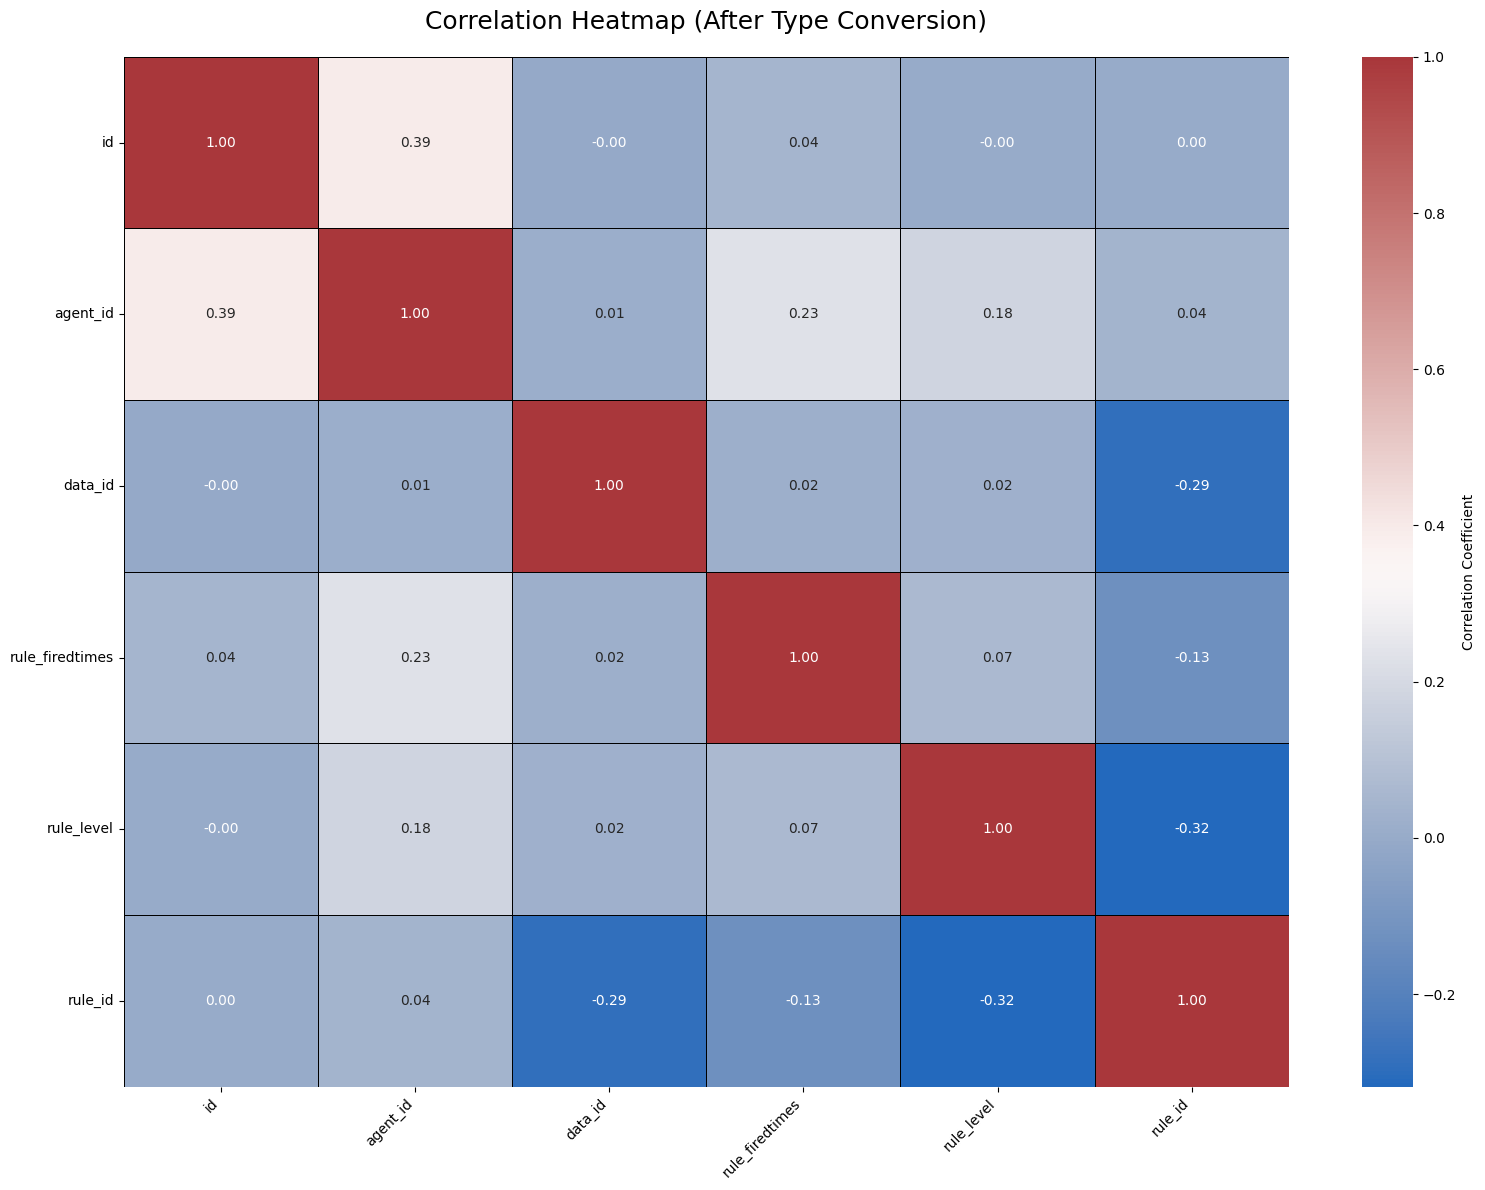

In [28]:
def convert_and_analyze_numeric(df: pd.DataFrame, title: str = "Correlation Heatmap of Numeric Log Fields"):
    """
    Identifies object columns that should be numeric, converts them, and then 
    generates a correlation heatmap.

    Args:
        df (pd.DataFrame): The input DataFrame.
        title (str): The title for the heatmap plot.
    """
    df_copy = df.copy() # Work on a copy to avoid modifying the original DF unexpectedly
    converted_cols = []
    
    # Identify and convert potential numeric columns (currently stored as object/string)
    
    # Iterate through all object columns
    for col in df_copy.select_dtypes(include=['object']).columns:
        
        # Try to convert the column to numeric.
        # errors='coerce' is crucial: if a value cannot be converted (e.g., 'N/A' or 'True'),
        # it is replaced with NaN.
        series_numeric = pd.to_numeric(df_copy[col], errors='coerce')
        
        # Check if the conversion resulted in significantly fewer NaNs than if we treated
        # the entire column as numeric (i.e., if it seems primarily numeric).
        # We check if the number of NA values is less than 5% of the total rows 
        # *AND* if the column has unique values (to skip fully empty columns).
        
        # Count NaNs AFTER coercion
        n_nan_after = series_numeric.isna().sum()
        total_rows = len(df_copy)
        
        # Calculate the number of non-NaN numeric values
        n_numeric_values = total_rows - n_nan_after

        # Heuristic check: If most values are convertible (e.g., > 95%)
        # and there is at least one converted value, we proceed with conversion.
        if n_numeric_values > 0 and (n_nan_after / total_rows) < 0.95:
             # Check if conversion actually changed the type (i.e., it was not already numeric)
            if series_numeric.dtype != df_copy[col].dtype:
                df_copy[col] = series_numeric
                converted_cols.append(col)

    if converted_cols:
        print(f"Converted {len(converted_cols)} object columns to numeric:")
        print("   " + ", ".join(converted_cols))
    else:
        print("No object columns were converted to numeric based on conversion heuristics.")

    # Select only numeric columns for correlation analysis
    numeric_df = df_copy.select_dtypes(include=np.number)
    
    # Check if we have enough numeric columns left
    if len(numeric_df.columns) < 2:
        print("Error: Fewer than two numeric columns remain for correlation analysis.")
        return

    print(f"\nCalculating correlation matrix for {len(numeric_df.columns)} numeric columns...")
    
    # Calculate the Correlation Matrix
    correlation_matrix = numeric_df.corr()
    
    # Setup and Generate the Heatmap
    plt.figure(figsize=(16, 12))
    
    sns.heatmap(
        correlation_matrix,
        annot=True,          
        fmt=".2f",           
        cmap='vlag',         
        linewidths=.5,       
        linecolor='black',   
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    plt.title(title, fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

convert_and_analyze_numeric(df, title="Correlation Heatmap (After Type Conversion)")

In [29]:
cols_to_drop = ['agent_id', 'data_id', 'decoder_name']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600263 entries, 0 to 2600262
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   full_log          object 
 1   @timestamp        object 
 2   location          object 
 3   id                float64
 4   filename          object 
 5   agent_ip          object 
 6   data_srcip        object 
 7   rule_firedtimes   int64  
 8   rule_level        int64  
 9   rule_pci_dss      object 
 10  rule_tsc          object 
 11  rule_description  object 
 12  rule_groups       object 
 13  rule_id           object 
 14  rule_nist_800_53  object 
 15  rule_gdpr         object 
dtypes: float64(1), int64(2), object(13)
memory usage: 317.4+ MB


In [ ]:
# relevant_cols = ['id', 'agent_ip', 'data_srcip', 'timestamp', 'rule_level', 'rule_description', 'rule_firedtimes', 'rule_groups', 'rule_id',
#                  'rule_nist_800_53', 'rule_gdpr', 'full_log', 'rule_pci_dss', 'rule_tsc'] 


In [30]:
df.to_parquet(path=os.path.join(extract_dir, parquet_processed_filename))